<a href="https://colab.research.google.com/github/fotrino/austral/blob/main/PyCaret_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Pycaret

In [1]:
! pip install --quiet pycaret
! pip install --quiet pandas-profiling

     |████████████████████████████████| 264 kB 8.8 MB/s 
     |████████████████████████████████| 1.3 MB 49.4 MB/s 
     |████████████████████████████████| 271 kB 61.5 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 167 kB 56.3 MB/s 
     |████████████████████████████████| 1.7 MB 25.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 111 kB 65.4 MB/s 
     |████████████████████████████████| 14.6 MB 120 kB/s 
     |████████████████████████████████| 2.0 MB 50.0 MB/s 
     |████████████████████████████████| 6.8 MB 41.5 MB/s 
     |████████████████████████████████| 248 kB 71.5 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 675 kB 41.9 MB/s 
     |████████████████████████████████| 62 kB 875 kB/s 
     |████████████████████

In [45]:
# from pycaret.datasets import get_data
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns= ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df = df.drop(columns='Petal Width')
df

,Sepal Length,Sepal Width,Petal Length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [46]:
df.shape

(150, 3)

# Analisis exploratorio

In [47]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [48]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
profile.to_file("analisisExploratorio.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Clustering

In [50]:
from pycaret.clustering import *

In [51]:
exp_name = setup(data = df,
                 silent=True, 
                 session_id = 123,
                 normalize=True,
                 normalize_method='robust')

,Description,Value
0,session_id,123
1,Original Data,"(150, 3)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(150, 3)"
9,CPU Jobs,-1


# Kmeans

Puede haber casos en los que no existan grupos naturales, o clusters que contengan una verdadera razón de ser. Si bien K-means siempre nos brindará “k clusters”, quedará en nuestro criterio reconocer la utilidad de los mismos o bien revisar nuestras features y descartar las que no sirven o conseguir nuevas.

In [54]:
kmeans = create_model('kmeans') # Por defecto utiliza 4 cluster. No busca los mejores hiperparametros

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4265,152.3271,0.7633,0,0,0


In [55]:
plot_model(kmeans)

# Metodo Elbow
Este metodo evalua diferentes tamaños de clusters (K=1,2,3,4,5)
Para determinar el número óptimo de grupos se selecciona el punto después del cual la distorsión/inercia comienza a disminuir de forma lineal. Es decir se genera un codo

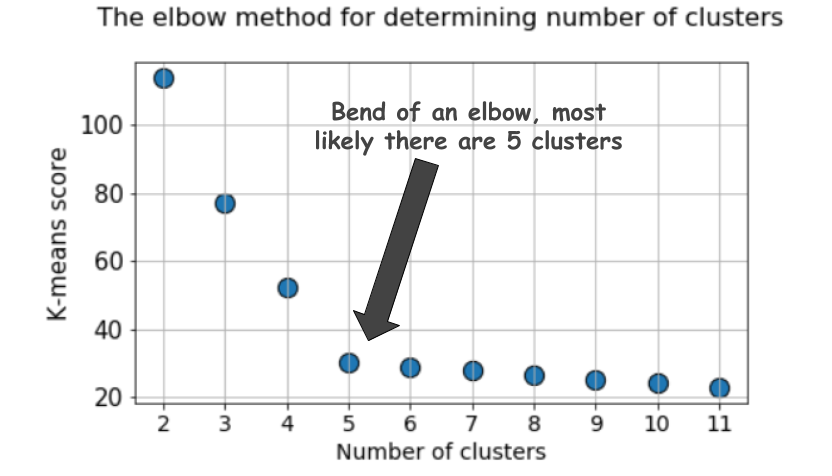

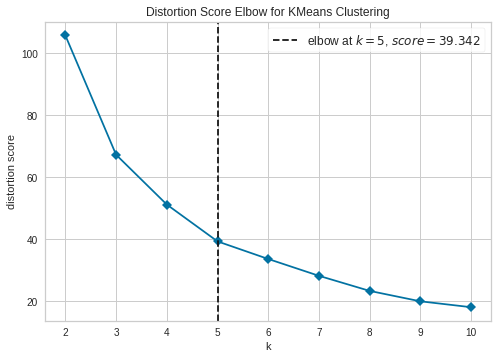

In [56]:
# Seleccion de cantidad de clusters
plot_model(kmeans, plot = 'elbow')

In [68]:
# Entreno con 5 Cluster que me indica el metodo elbow
kmeans = create_model('kmeans',num_clusters=3) 

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4384,157.5757,0.8033,0,0,0


In [69]:
plot_model(kmeans) # Valido que los detecte correctamente

In [70]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [71]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

# Interpretar Clusters


In [72]:
results_df = assign_model(kmeans)

In [73]:
results_df.set_index('Cluster', inplace=True)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
results_df = results_df.select_dtypes(include=numerics)

In [77]:
data = results_df.groupby("Cluster").mean()
data

,Sepal Length,Sepal Width,Petal Length
Cluster,,,
Cluster 0,6.690741,3.087037,5.353704
Cluster 1,5.016327,3.451020,1.465306
Cluster 2,5.731915,2.612766,4.314894


# Referencias
* https://towardsdatascience.com/evaluating-goodness-of-clustering-for-unsupervised-learning-case-ccebcfd1d4f1
* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
* https://scikit-learn.org/stable/modules/clustering.html#clustering
* Libro: A Concise Guide to Market Research - CAPITULO 9
